# Midterm Practice: Predicting Boston Home Values

In this lab, we are predicting the natural log of the sum of all transactions per user.  
This is a great chance to practice all of our skills to date in order to create a regression model.
Start by importing the data and analyzing it briefly. Then, start fitting a model and performing successive iterations to tune and refine your model.

All data is stored in a csv file, 'train.csv' in the Data folder.
  
# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [1]:
#Your code here

## LF - Explore

In [1]:
# Import the libraries we need
import pandas as pd

In [2]:
# Read the data in
df = pd.read_csv('Data/train.csv')
df.head()

ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9

In [3]:
# Get a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [4]:
# Get a summary of the features
df.describe()

ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320    0.000000    0.740000    0.000000    0.385000   
25%    123.000000    0.078960    0.000000    5.130000    0.000000    0.453000   
50%    244.000000    0.261690    0.000000    9.900000    0.000000    0.538000   
75%    377.000000    3.678220   12.500000   18.100000    0.000000    0.631000   
max    506.000000   73.534100  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean     6.265619   68.226426    3.709934    9.633634  409.279279   18.448048   
std      0.703952   28.133344    1.981123    8.742174  170.841988    2.151821   
min      3.561000    6.000000    1.129600    1.000000  188.000000   12.600000   
25%      5.884000   45.400000    2.122400    4.000000  279.000000   17.400000   
50%      6.202000   76.700000    3.092300    5.000000  330.000000   19.000000   
75%      6.595000   93.800000    5.116700   24.000000  666.000000   20.200000   
max      8.725000  100.000000   10.710300   24.000000  711.000000   21.200000   

            black       lstat        medv  
count  333.000000  333.000000  333.000000  
mean   359.466096   12.515435   22.768769  
std     86.584567    7.067781    9.173468  
min      3.500000    1.730000    5.000000  
25%    376.730000    7.180000   17.400000  
50%    392.050000   10.970000   21.600000  
75%    396.240000   16.420000   25.000000  
max    396.900000   37.970000   50.000000

In [5]:
# Maybe inspect a feature in detail
df.lstat.value_counts()

18.13    3
5.68     2
6.58     2
7.79     2
14.10    2
9.97     2
3.16     2
8.10     2
9.50     2
12.03    2
10.45    2
6.36     2
5.33     2
7.60     2
7.39     2
21.32    2
3.95     2
8.05     2
4.45     2
5.50     2
13.27    2
23.98    2
8.81     1
28.28    1
12.13    1
9.08     1
20.45    1
14.15    1
11.34    1
4.82     1
        ..
16.94    1
9.55     1
18.85    1
14.70    1
26.77    1
17.15    1
10.59    1
5.29     1
8.26     1
11.45    1
5.04     1
7.12     1
4.85     1
2.88     1
16.35    1
12.14    1
6.72     1
16.14    1
18.03    1
13.45    1
22.60    1
8.67     1
12.86    1
16.90    1
17.58    1
9.45     1
3.01     1
5.10     1
12.93    1
8.23     1
Name: lstat, Length: 310, dtype: int64

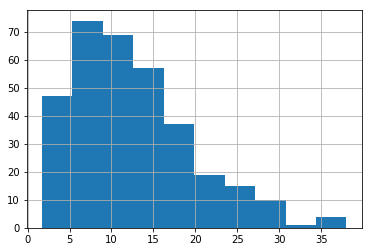

In [6]:
%matplotlib inline
df.lstat.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002243CDCDF28>,
      dtype=object)

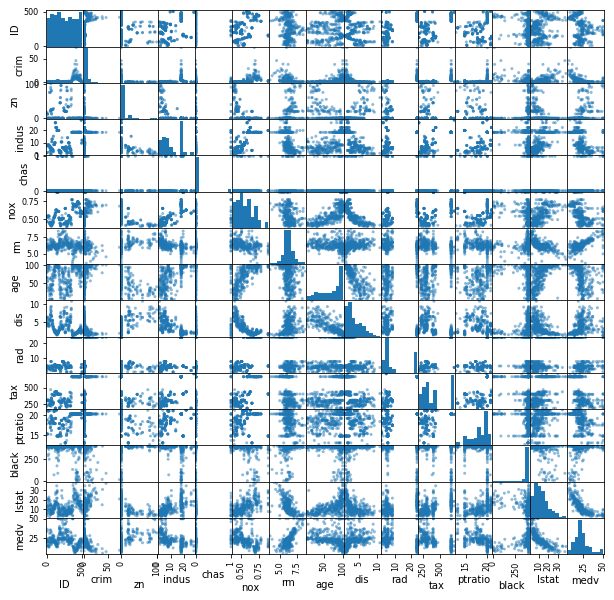

In [7]:
# Look at correlations
pd.plotting.scatter_matrix(df, figsize=(10,10))

## Train an initial model without feature engineering
We can see how this goes first!

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [9]:
# We want to predict home values.  This will be our output feature
y = df['medv']

In [10]:
# Let's use everything else as input
X = df.drop('medv', axis=1)

In [11]:
# Split into training and test sets (4 sets in total)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)   

In [12]:
# Create and fit a linear regression model
model = LinearRegression()

# Use training data to fit model (i.e. train the model) 
model.fit(X_train, y_train)

# Use training inputs to predict training outputs
y_hat_train = model.predict(X_train)

# Use test inputs to predict test outputs
y_hat_test = model.predict(X_test)

# Compute MSE to see how we did
# For MSE lower is better
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

# Compute R2 to see how we did
# For R2 lower is better
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)


In [13]:
# See how we did
train_mse, test_mse, train_score, test_score

(22.42735846159377, 22.917599129475654, 0.7197811971354016, 0.7595126329066872)

In [14]:
# Let's wrap the above in a function so we can use it multiple times
def FitModel(model, X_train, y_train, X_test):

    # Use training data to fit model (i.e. train the model) 
    model.fit(X_train, y_train)

    # Use training inputs to predict training outputs
    y_hat_train = model.predict(X_train)

    # Use test inputs to predict test outputs
    y_hat_test = model.predict(X_test)
    
    # Compute MSE to see how we did
    # For MSE lower is better
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    # Compute R2 to see how we did
    # For R2 lower is better
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    return y_hat_train, y_hat_test, train_mse, test_mse, train_score, test_score

In [15]:
# Create an fit model
linreg = LinearRegression()
y_hat_train, y_hat_test, train_mse, test_mse, train_score, test_score = FitModel(linreg, X_train, y_train, X_test)
train_mse, test_mse, train_score, test_score

(22.42735846159377, 22.917599129475654, 0.7197811971354016, 0.7595126329066872)

In [16]:
# Create function to show original and prediction together - just for human reassurance
def ComparePredictionsWithOriginals(df, original, predictions):
    dfCompare = df.copy()
    dfCompare['Original'] = original
    dfCompare['Predictions'] = predictions
    return dfCompare

In [38]:
ComparePredictionsWithOriginals(X_test, y_test, y_hat_test)

ID      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
237  360   4.26131   0.0  18.10     0  0.770  6.112   81.3  2.5091   24  666   
200  303   0.09266  34.0   6.09     0  0.433  6.495   18.4  5.4917    7  329   
158  231   0.53700   0.0   6.20     0  0.504  5.981   68.1  3.6715    8  307   
294  454   8.24809   0.0  18.10     0  0.713  7.393   99.3  2.4527   24  666   
280  434   5.58107   0.0  18.10     0  0.713  6.436   87.9  2.3158   24  666   
19    32   1.35472   0.0   8.14     0  0.538  6.072  100.0  4.1750    4  307   
290  448   9.92485   0.0  18.10     0  0.740  6.251   96.6  2.1980   24  666   
5     11   0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
189  284   0.01501  90.0   1.21     1  0.401  7.923   24.8  5.8850    1  198   
235  358   3.84970   0.0  18.10     1  0.770  6.395   91.0  2.5052   24  666   
67   101   0.14866   0.0   8.56     0  0.520  6.727   79.9  2.7778    5  384   
309  472   4.03841   0.0  18.10     0  0.532  6.229   90.7  3.0993   24  666   
184  274   0.22188  20.0   6.96     1  0.464  7.691   51.8  4.3665    3  223   
214  321   0.16760   0.0   7.38     0  0.493  6.426   52.3  4.5404    5  287   
316  481   5.82401   0.0  18.10     0  0.532  6.242   64.7  3.4242   24  666   
213  319   0.40202   0.0   9.90     0  0.544  6.382   67.2  3.5325    4  304   
281  435  13.91340   0.0  18.10     0  0.713  6.208   95.0  2.2222   24  666   
131  188   0.07875  45.0   3.44     0  0.437  6.782   41.1  3.7886    5  398   
73   109   0.12802   0.0   8.56     0  0.520  6.474   97.1  2.4329    5  384   
132  190   0.08370  45.0   3.44     0  0.437  7.185   38.9  4.5667    5  398   
271  419  73.53410   0.0  18.10     0  0.679  5.957  100.0  1.8026   24  666   
247  374  11.10810   0.0  18.10     0  0.668  4.906  100.0  1.1742   24  666   
137  195   0.01439  60.0   2.93     0  0.401  6.604   18.8  6.2196    1  265   
195  293   0.03615  80.0   4.95     0  0.411  6.630   23.4  5.1167    4  245   
276  429   7.36711   0.0  18.10     0  0.679  6.193   78.1  1.9356   24  666   
206  310   0.34940   0.0   9.90     0  0.544  5.972   76.7  3.1025    4  304   
90   134   0.32982   0.0  21.89     0  0.624  5.822   95.4  2.4699    4  437   
273  425   8.79212   0.0  18.10     0  0.584  5.565   70.6  2.0635   24  666   
205  309   0.49298   0.0   9.90     0  0.544  6.635   82.5  3.3175    4  304   
192  287   0.01965  80.0   1.76     0  0.385  6.230   31.5  9.0892    1  241   
..   ...       ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
129  184   0.10008   0.0   2.46     0  0.488  6.563   95.6  2.8470    3  193   
155  227   0.38214   0.0   6.20     0  0.504  8.040   86.5  3.2157    8  307   
28    47   0.18836   0.0   6.91     0  0.448  5.786   33.3  5.1004    3  233   
12    19   0.80271   0.0   8.14     0  0.538  5.456   36.6  3.7965    4  307   
7     13   0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311   
164  241   0.11329  30.0   4.93     0  0.428  6.897   54.3  6.3361    6  300   
149  217   0.04560   0.0  13.89     1  0.550  5.888   56.0  3.1121    5  276   
148  215   0.28955   0.0  10.59     0  0.489  5.412    9.8  3.5875    4  277   
159  233   0.57529   0.0   6.20     0  0.507  8.337   73.3  3.8384    8  307   
227  343   0.02498   0.0   1.89     0  0.518  6.540   59.7  6.2669    1  422   
38    59   0.15445  25.0   5.13     0  0.453  6.145   29.2  7.8148    8  284   
260  397   5.87205   0.0  18.10     0  0.693  6.405   96.0  1.6768   24  666   
256  390   8.15174   0.0  18.10     0  0.700  5.390   98.9  1.7281   24  666   
207  311   2.63548   0.0   9.90     0  0.544  4.973   37.8  2.5194    4  304   
166  244   0.12757  30.0   4.93     0  0.428  6.393    7.8  7.0355    6  300   
220  334   0.05083   0.0   5.19     0  0.515  6.316   38.1  6.4584    5  224   
79   119   0.13058   0.0  10.01     0  0.547  5.872   73.1  2.4775    6  432   
230  348   0.01870  85.0   4.15     0  0.429  6.516   27.7  8.5353    4  351   
100  1

In [17]:
# Now do the same with Ridge
ridge = Ridge()
y_hat_train, y_hat_test, train_mse, test_mse, train_score, test_score = FitModel(ridge, X_train, y_train, X_test)
train_mse, test_mse, train_score, test_score

(22.575998049122703,
 23.539575197191375,
 0.7179240186653213,
 0.7529858852279732)

In [18]:
ComparePredictionsWithOriginals(X_test, y_test, y_hat_test)

ID      crim     zn  indus  chas    nox     rm    age     dis  rad  tax  \
184  274   0.22188   20.0   6.96     1  0.464  7.691   51.8  4.3665    3  223   
71   107   0.17120    0.0   8.56     0  0.520  5.836   91.9  2.2110    5  384   
316  481   5.82401    0.0  18.10     0  0.532  6.242   64.7  3.4242   24  666   
263  402  14.23620    0.0  18.10     0  0.693  6.343  100.0  1.5741   24  666   
41    64   0.12650   25.0   5.13     0  0.453  6.762   43.4  7.9809    8  284   
8     14   0.62976    0.0   8.14     0  0.538  5.949   61.8  4.7075    4  307   
259  395  13.35980    0.0  18.10     0  0.693  5.887   94.7  1.7821   24  666   
189  284   0.01501   90.0   1.21     1  0.401  7.923   24.8  5.8850    1  198   
130  187   0.05602    0.0   2.46     0  0.488  7.831   53.6  3.1992    3  193   
70   104   0.21161    0.0   8.56     0  0.520  6.137   87.4  2.7147    5  384   
240  366   4.55587    0.0  18.10     0  0.718  3.561   87.9  1.6132   24  666   
124  179   0.06642    0.0   4.05     0  0.510  6.860   74.4  2.9153    5  296   
301  463   6.65492    0.0  18.10     0  0.713  6.317   83.0  2.7344   24  666   
227  343   0.02498    0.0   1.89     0  0.518  6.540   59.7  6.2669    1  422   
86   127   0.38735    0.0  25.65     0  0.581  5.613   95.6  1.7572    2  188   
117  172   2.31390    0.0  19.58     0  0.605  5.880   97.3  2.3887    5  403   
198  298   0.14103    0.0  13.92     0  0.437  5.790   58.0  6.3200    4  289   
166  244   0.12757   30.0   4.93     0  0.428  6.393    7.8  7.0355    6  300   
162  236   0.33045    0.0   6.20     0  0.507  6.086   61.5  3.6519    8  307   
223  339   0.03306    0.0   5.19     0  0.515  6.059   37.3  4.8122    5  224   
120  175   0.08447    0.0   4.05     0  0.510  5.859   68.7  2.7019    5  296   
107  160   1.42502    0.0  19.58     0  0.871  6.510  100.0  1.7659    5  403   
167  245   0.20608   22.0   5.86     0  0.431  5.593   76.5  7.9549    7  330   
244  371   6.53876    0.0  18.10     1  0.631  7.016   97.5  1.2024   24  666   
252  384   7.99248    0.0  18.10     0  0.700  5.520  100.0  1.5331   24  666   
79   119   0.13058    0.0  10.01     0  0.547  5.872   73.1  2.4775    6  432   
283  440   9.39063    0.0  18.10     0  0.740  5.627   93.9  1.8172   24  666   
275  428  37.66190    0.0  18.10     0  0.679  6.202   78.7  1.8629   24  666   
66    97   0.11504    0.0   2.89     0  0.445  6.163   69.6  3.4952    2  276   
169  249   0.16439   22.0   5.86     0  0.431  6.433   49.1  7.8265    7  330   
..   ...       ...    ...    ...   ...    ...    ...    ...     ...  ...  ...   
329  502   0.06263    0.0  11.93     0  0.573  6.593   69.1  2.4786    1  273   
174  261   0.54011   20.0   3.97     0  0.647  7.203   81.8  2.1121    5  264   
34    55   0.01360   75.0   4.00     0  0.410  5.888   47.6  7.3197    3  469   
14    22   0.85204    0.0   8.14     0  0.538  5.965   89.2  4.0123    4  307   
72   108   0.13117    0.0   8.56     0  0.520  6.127   85.2  2.1224    5  384   
239  363   3.67822    0.0  18.10     0  0.770  5.362   96.2  2.1036   24  666   
74   110   0.26363    0.0   8.56     0  0.520  6.229   91.2  2.5451    5  384   
30    50   0.21977    0.0   6.91     0  0.448  5.602   62.0  6.0877    3  233   
29    48   0.22927    0.0   6.91     0  0.448  6.030   85.5  5.6894    3  233   
237  360   4.26131    0.0  18.10     0  0.770  6.112   81.3  2.5091   24  666   
231  349   0.01501   80.0   2.01     0  0.435  6.635   29.7  8.3440    4  280   
276  429   7.36711    0.0  18.10     0  0.679  6.193   78.1  1.9356   24  666   
288  445  12.80230    0.0  18.10     0  0.740  5.854   96.6  1.8956   24  666   
137  195   0.01439   60.0   2.93     0  0.401  6.604   18.8  6.2196    1  265   
209  313   0.26169    0.0   9.90     0  0.544  6.023   90.4  2.8340    4  304   
328  500   0.17783    0.0   9.69     0  0.585  5.569   73.5  2.3999    6  391   
95   140   0.54452    0.0  21.89     0  0.624  6.151   97.9  1.6687    4  437   
298  460   6.80117    0.0  18.10     

In [19]:
# Now do the same with Lasso
lasso = Lasso()
y_hat_train, y_hat_test, train_mse, test_mse, train_score, test_score = FitModel(lasso, X_train, y_train, X_test)
train_mse, test_mse, train_score, test_score

(27.845912732240116, 30.28925090822931, 0.6520790291080094, 0.6821577094094387)

In [20]:
ComparePredictionsWithOriginals(X_test, y_test, y_hat_test)

ID      crim     zn  indus  chas    nox     rm    age     dis  rad  tax  \
184  274   0.22188   20.0   6.96     1  0.464  7.691   51.8  4.3665    3  223   
71   107   0.17120    0.0   8.56     0  0.520  5.836   91.9  2.2110    5  384   
316  481   5.82401    0.0  18.10     0  0.532  6.242   64.7  3.4242   24  666   
263  402  14.23620    0.0  18.10     0  0.693  6.343  100.0  1.5741   24  666   
41    64   0.12650   25.0   5.13     0  0.453  6.762   43.4  7.9809    8  284   
8     14   0.62976    0.0   8.14     0  0.538  5.949   61.8  4.7075    4  307   
259  395  13.35980    0.0  18.10     0  0.693  5.887   94.7  1.7821   24  666   
189  284   0.01501   90.0   1.21     1  0.401  7.923   24.8  5.8850    1  198   
130  187   0.05602    0.0   2.46     0  0.488  7.831   53.6  3.1992    3  193   
70   104   0.21161    0.0   8.56     0  0.520  6.137   87.4  2.7147    5  384   
240  366   4.55587    0.0  18.10     0  0.718  3.561   87.9  1.6132   24  666   
124  179   0.06642    0.0   4.05     0  0.510  6.860   74.4  2.9153    5  296   
301  463   6.65492    0.0  18.10     0  0.713  6.317   83.0  2.7344   24  666   
227  343   0.02498    0.0   1.89     0  0.518  6.540   59.7  6.2669    1  422   
86   127   0.38735    0.0  25.65     0  0.581  5.613   95.6  1.7572    2  188   
117  172   2.31390    0.0  19.58     0  0.605  5.880   97.3  2.3887    5  403   
198  298   0.14103    0.0  13.92     0  0.437  5.790   58.0  6.3200    4  289   
166  244   0.12757   30.0   4.93     0  0.428  6.393    7.8  7.0355    6  300   
162  236   0.33045    0.0   6.20     0  0.507  6.086   61.5  3.6519    8  307   
223  339   0.03306    0.0   5.19     0  0.515  6.059   37.3  4.8122    5  224   
120  175   0.08447    0.0   4.05     0  0.510  5.859   68.7  2.7019    5  296   
107  160   1.42502    0.0  19.58     0  0.871  6.510  100.0  1.7659    5  403   
167  245   0.20608   22.0   5.86     0  0.431  5.593   76.5  7.9549    7  330   
244  371   6.53876    0.0  18.10     1  0.631  7.016   97.5  1.2024   24  666   
252  384   7.99248    0.0  18.10     0  0.700  5.520  100.0  1.5331   24  666   
79   119   0.13058    0.0  10.01     0  0.547  5.872   73.1  2.4775    6  432   
283  440   9.39063    0.0  18.10     0  0.740  5.627   93.9  1.8172   24  666   
275  428  37.66190    0.0  18.10     0  0.679  6.202   78.7  1.8629   24  666   
66    97   0.11504    0.0   2.89     0  0.445  6.163   69.6  3.4952    2  276   
169  249   0.16439   22.0   5.86     0  0.431  6.433   49.1  7.8265    7  330   
..   ...       ...    ...    ...   ...    ...    ...    ...     ...  ...  ...   
329  502   0.06263    0.0  11.93     0  0.573  6.593   69.1  2.4786    1  273   
174  261   0.54011   20.0   3.97     0  0.647  7.203   81.8  2.1121    5  264   
34    55   0.01360   75.0   4.00     0  0.410  5.888   47.6  7.3197    3  469   
14    22   0.85204    0.0   8.14     0  0.538  5.965   89.2  4.0123    4  307   
72   108   0.13117    0.0   8.56     0  0.520  6.127   85.2  2.1224    5  384   
239  363   3.67822    0.0  18.10     0  0.770  5.362   96.2  2.1036   24  666   
74   110   0.26363    0.0   8.56     0  0.520  6.229   91.2  2.5451    5  384   
30    50   0.21977    0.0   6.91     0  0.448  5.602   62.0  6.0877    3  233   
29    48   0.22927    0.0   6.91     0  0.448  6.030   85.5  5.6894    3  233   
237  360   4.26131    0.0  18.10     0  0.770  6.112   81.3  2.5091   24  666   
231  349   0.01501   80.0   2.01     0  0.435  6.635   29.7  8.3440    4  280   
276  429   7.36711    0.0  18.10     0  0.679  6.193   78.1  1.9356   24  666   
288  445  12.80230    0.0  18.10     0  0.740  5.854   96.6  1.8956   24  666   
137  195   0.01439   60.0   2.93     0  0.401  6.604   18.8  6.2196    1  265   
209  313   0.26169    0.0   9.90     0  0.544  6.023   90.4  2.8340    4  304   
328  500   0.17783    0.0   9.69     0  0.585  5.569   73.5  2.3999    6  391   
95   140   0.54452    0.0  21.89     0  0.624  6.151   97.9  1.6687    4  437   
298  460   6.80117    0.0  18.10     

In [21]:
# Now do the same with Ridge CV
ridgecv = RidgeCV()
y_hat_train, y_hat_test, train_mse, test_mse, train_score, test_score = FitModel(ridgecv, X_train, y_train, X_test)
train_mse, test_mse, train_score, test_score

(22.433780886591933, 23.01968159836419, 0.7197009520968449, 0.7584414236569447)

In [22]:
# Now do the same with Lasso CV
lassocv = LassoCV()
y_hat_train, y_hat_test, train_mse, test_mse, train_score, test_score = FitModel(lassocv, X_train, y_train, X_test)
train_mse, test_mse, train_score, test_score

(25.27258270808974, 27.052037736107554, 0.6842315208951185, 0.7161276234517027)

Conclusion: not terrible, but not great with any of these models!

## Visual inspection of how predictions and actuals are distributed

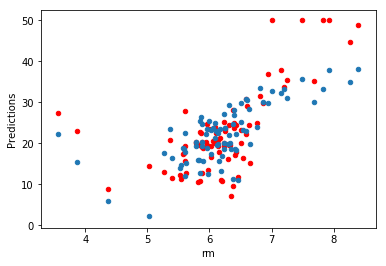

In [27]:
# We can change x_feat to any feature
compare = ComparePredictionsWithOriginals(X_test, y_test, y_hat_test)
x_feat = 'rm'
ax1 = compare[['rm','Original','Predictions']].plot(x=x_feat,y='Original', kind='scatter', color='red')
ax2 = compare[['rm','Original','Predictions']].plot(x=x_feat,y='Predictions', kind='scatter', ax=ax1)


From here we can try other things: feature selection, tweaking parameters of algorithms, normalisation, polynomial features, etc